In [1]:
# For converting the csv file to an indexed array and manipulation
import pandas as pd 
import numpy as np

# For data visualization.
import matplotlib.pyplot as plt 

# For the actual regression model. 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
# Using the csv file from path 
file_path = "/Users/Aksha/ml/corona_india.csv"
df = pd.read_csv(file_path)
df.head()

,id,cases
0,1,27
1,2,27
2,3,27
3,4,44
4,5,44


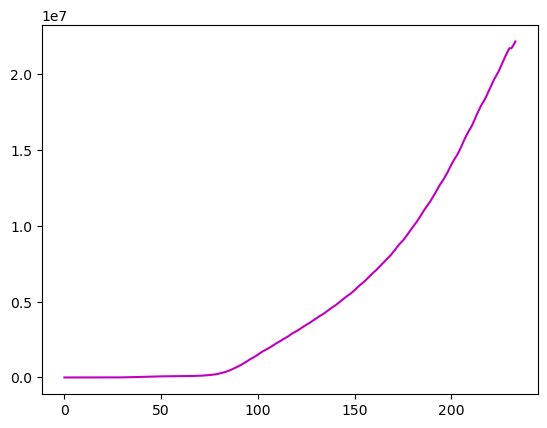

In [3]:
# Training the dataset from the pandas.DataFrame
x_train = np.array(df['id']).reshape(-1, 1)
y_train = np.array(df['cases']).reshape(-1, 1)
plt.plot(y_train, '-m')

In [4]:
# Loading the polynomial regression algorithm and transforming the dataset
poly = PolynomialFeatures(degree=3)
X = poly.fit_transform(x_train)
print(X)

[[1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00]
 [1.0000000e+00 3.0000000e+00 9.0000000e+00 2.7000000e+01]
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 6.4000000e+01]
 [1.0000000e+00 5.0000000e+00 2.5000000e+01 1.2500000e+02]
 [1.0000000e+00 6.0000000e+00 3.6000000e+01 2.1600000e+02]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02]
 [1.0000000e+00 8.0000000e+00 6.4000000e+01 5.1200000e+02]
 [1.0000000e+00 9.0000000e+00 8.1000000e+01 7.2900000e+02]
 [1.0000000e+00 1.0000000e+01 1.0000000e+02 1.0000000e+03]
 [1.0000000e+00 1.1000000e+01 1.2100000e+02 1.3310000e+03]
 [1.0000000e+00 1.2000000e+01 1.4400000e+02 1.7280000e+03]
 [1.0000000e+00 1.3000000e+01 1.6900000e+02 2.1970000e+03]
 [1.0000000e+00 1.4000000e+01 1.9600000e+02 2.7440000e+03]
 [1.0000000e+00 1.5000000e+01 2.2500000e+02 3.3750000e+03]
 [1.0000000e+00 1.6000000e+01 2.5600000e+02 4.0960000e+03]
 [1.0000000e+00 1.7000000e+01 2.8900000e+02 4.9130000e+0

In [5]:
# Calculating the accuracy of the training algorithm
regr = linear_model.LinearRegression()
regr.fit(X, y_train)
accuracy = regr.score(X, y_train)
print(f"Accuracy of the model: {round(accuracy*100, 2)}%")
y_predict = regr.predict(X)

Accuracy of the model: 99.92%


In [ ]:
# Predicting the number of cases 90 days ahead
no_days = 45
print("Cases after 90 days: ", end='')
print(round(int(regr.predict(poly.fit_transform([[45+no_days]])))/100000, 2), 'Million')

In [ ]:
# Plotting the training datasets and the predictions
x_train = np.asanyarray(list(range(1, 45+no_days))).reshape(-1, 1)
y_train = regr.predict(poly.fit_transform(x_train))
plt.plot(y_train, '--r')

In [ ]:
plt.plot(y_predict, '--m')